In [27]:
import gym
import random
import numpy as np
from matplotlib import pyplot as plt

In [28]:
env = gym.make('MountainCar-v0')
observation = env.reset()

In [78]:
def learn(lr, df, episodes, epsilon, min_eps, log=False, render=False):
    # Initialize q table
    q = np.random.uniform(low = -1, high = 1, size = (19, 15, 3))
    # q = np.random.normal(0, 10, (19, 15, 3))
    # q = np.zeros((19, 15, 3))
        
    # Initialize rewards list
    rewards_list = []
    
    # Initialize epsilon gradient
    decrement = (epsilon - min_eps)/episodes
    
    for i in range(episodes):
        
        # Reset environment for each episode
        observation = env.reset()

        # Keeping track of reward
        reward_total = 0

        for step_index in range(200):
            if render:
                env.render()

            # Discretize observation values
            old_observation = observation
            old_loc = int(round(old_observation[0], 1)*10 + 12)
            old_vel = int(round(old_observation[1], 2)*100 + 7)

            # Choose action using epsilon greedy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q[loc][vel])
            epsilon -= decrement

            # Take action
            observation, reward, done, info = env.step(action)

            # Update reward total
            reward_total += reward

            # Discretize observation values
            loc = int(round(observation[0], 1)*10 + 12)
            vel = int(round(observation[1], 2)*100 + 7)

            # Update q table
            if done and observation[0] > 0.5:
                q[old_loc][old_vel][action] = reward
            else:                   
                max_q = np.amax(q[loc][vel])
                q[old_loc][old_vel][action] = q[old_loc][old_vel][action]*(1-lr) + lr*(reward + df*max_q)

            if done:
                break
        
        if log and (i + 1)%100 == 0:
            print(f"Episode {i + 1}: {reward_total}")
        rewards_list.append(reward_total)
    return q, rewards_list

Episode 100: -200.0
Episode 200: -200.0
Episode 300: -200.0
Episode 400: -163.0
Episode 500: -200.0
Episode 600: -200.0
Episode 700: -176.0
Episode 800: -200.0
Episode 900: -200.0
Episode 1000: -200.0
Episode 1100: -200.0
Episode 1200: -196.0
Episode 1300: -156.0
Episode 1400: -178.0
Episode 1500: -200.0
Episode 1600: -174.0
Episode 1700: -178.0
Episode 1800: -174.0
Episode 1900: -200.0
Episode 2000: -193.0
Episode 2100: -200.0
Episode 2200: -153.0
Episode 2300: -157.0
Episode 2400: -150.0
Episode 2500: -156.0
Episode 2600: -200.0
Episode 2700: -187.0
Episode 2800: -159.0
Episode 2900: -161.0
Episode 3000: -200.0
Episode 3100: -154.0
Episode 3200: -163.0
Episode 3300: -158.0
Episode 3400: -200.0
Episode 3500: -171.0
Episode 3600: -173.0
Episode 3700: -188.0
Episode 3800: -156.0
Episode 3900: -155.0
Episode 4000: -154.0
Episode 4100: -158.0
Episode 4200: -200.0
Episode 4300: -196.0
Episode 4400: -157.0
Episode 4500: -151.0
Episode 4600: -150.0
Episode 4700: -154.0
Episode 4800: -190.0
E

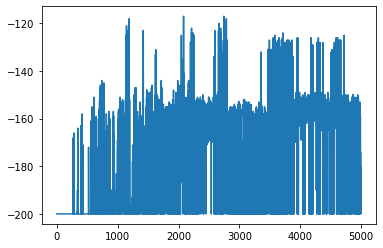

In [79]:
lr = 0.2
df = 0.9
episodes = 5000
epsilon = 0.8
min_eps = 0

q, rewards_list = learn(lr, df, episodes, epsilon, min_eps, log=True)
plt.plot(rewards_list)

In [80]:
def play_game(q, render=False, log=False):
    
    # Initialize environment and store initial conditions
    observation = env.reset()
    
    for i in range(200):
        if render:
            env.render()

        loc = int(round(observation[0], 1)*10 + 12)
        vel = int(round(observation[1], 2)*100 + 7)
        
        action = np.argmax(q[loc][vel])
        observation, reward, done, info = env.step(action)
        
        if log:
            print(f"Step {i}, action - {action}")
        
        if done:
            break
            
    return observation[0] > 0.5
    

In [81]:
def test(q, iterations, log=False, render=False):
    s = 0
    for i in range(iterations):
        result = play_game(q, render)
        s += result
        if log:
            print(f"Iteration {i} - {result}")
    return (s / iterations) * 100

In [86]:
test(q, iterations=1000)

81.6